In [22]:
import warnings
from pathlib import Path

import iris
import iris.cube
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np

In [23]:
from aeolus.model import um
from aeolus.synthobs import (
    calc_stellar_flux,
    calc_transmission_spectrum,
    calc_transmission_spectrum_day_night_average,
    read_normalized_stellar_flux,
    read_spectral_bands,
)

In [24]:
warnings.filterwarnings("ignore", module="iris")
plt.rcParams["mathtext.default"] = "regular"

In [25]:
# Note that the file paths should be pathlib.Path-like objects, not just plain strings!
SPECTRUM_DIR = Path.cwd().parent.parent.parent / "data" / "dc605" / "For_WASP-96b_Students" 

DATA_DIR = Path.cwd().parent / "cylc-run" / "u-co736" / "work" / "1" / "atmos_base_0000"

#/home/um/um/uoesa_data/current/spectral/HD209_CK/
#/data/bm424/cylc-run/u-co736/work/1/atmos_base_0000
#/data/dc605/For_WASP-96b_Students

In [26]:
print(SPECTRUM_DIR)

print(Path.cwd().parent)
print(DATA_DIR)

/data/dc605/For_WASP-96b_Students
/home/bm424
/home/bm424/cylc-run/u-co736/work/1/atmos_base_0000


In [27]:
spectral_file = SPECTRUM_DIR / "spec_file_wasp96b_mdh0_sw_500"
data_file = DATA_DIR / "atmosa.pd00000000_00"
pd0 = iris.load(data_file)

print(pd0)
spectrum_data = pd0.extract_cube("m01s01i755")


# To keep the units of stellar and planetary parameters, store the parameters as iris cubes
stellar_constant_at_1_au = iris.cube.Cube(
    1275.359867, units="W m-2", long_name="stellar_constant_at_1_au"
)
stellar_radius = iris.cube.Cube(7.31e8, units="m", long_name="stellar_radius")
planet_radius = iris.cube.Cube(83893200, units="m", long_name="planet_radius")
planet_domain_height = iris.cube.Cube(10290010.373390205, units="m", long_name="height_domain")
planet_top_of_atmosphere = planet_radius + planet_domain_height

0: m01s01i755 / (unknown)              (pseudo_level: 500; time: 2; latitude: 90; longitude: 144)
1: air_pressure / (Pa)                 (time: 3; model_level_number: 67; latitude: 90; longitude: 144)
2: toa_incoming_shortwave_flux / (W m-2) (time: 2; latitude: 90; longitude: 144)
3: toa_outgoing_longwave_flux / (W m-2) (time: 2; latitude: 90; longitude: 144)
4: toa_outgoing_shortwave_flux / (W m-2) (time: 2; latitude: 90; longitude: 144)


In [28]:
read_spectral_bands(spectral_file)[0:4]  # print the first four spectral bands


array([(1, 9.9999997e-05, 9.9999998e-03),
       (2, 4.9999999e-05, 9.9999997e-05),
       (3, 3.3333334e-05, 4.9999999e-05),
       (4, 2.4999999e-05, 3.3333334e-05)],
      dtype=[('spectral_band_index', '<u4'), ('lower_wavelength_limit', '<f4'), ('upper_wavelength_limit', '<f4')])

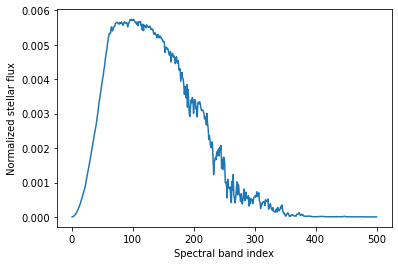

In [29]:
normalized_stellar_flux = read_normalized_stellar_flux(spectral_file)

plt.plot(
    normalized_stellar_flux.coord("spectral_band_index").points,
    normalized_stellar_flux.data,
)
plt.xlabel("Spectral band index")
plt.ylabel("Normalized stellar flux");

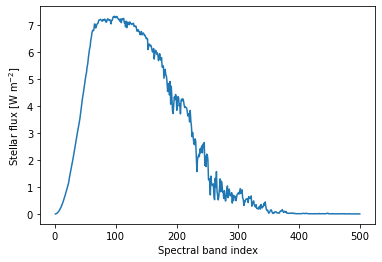

In [30]:
stellar_flux = calc_stellar_flux(spectral_file, stellar_constant_at_1_au)

plt.plot(stellar_flux.coord("spectral_band_index").points, stellar_flux.data)
plt.xlabel("Spectral band index")
plt.ylabel("Stellar flux [W $m^{-2}$]");

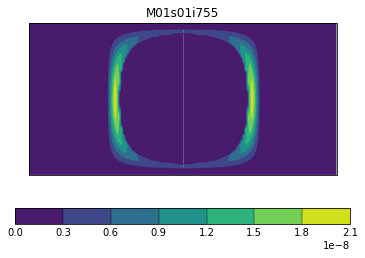

In [31]:

spectrum_data_1time = spectrum_data[:,1,:,:]

#spectrum_data_1time

#print(spectrum_data.shape)

qplt.contourf(spectrum_data_1time[2, ...]);




In [32]:
rp_eff_over_rs = calc_transmission_spectrum(
    spectrum_data_1time,
    spectral_file,
    stellar_constant_at_1_au,
    stellar_radius,
    planet_top_of_atmosphere,
    model=um,
)

In [33]:
print(stellar_flux.shape)

print(spectrum_data_1time.shape)

(500,)
(500, 90, 144)


In [34]:
rp_eff_over_rs.data

array([0.12419447, 0.12559971, 0.1257183 , 0.12555029, 0.12538346,
       0.12521063, 0.1253247 , 0.12488843, 0.12440239, 0.12427457,
       0.12439518, 0.12484634, 0.12529513, 0.12543573, 0.12567743,
       0.12541482, 0.12524037, 0.12550292, 0.12539045, 0.1253381 ,
       0.12546352, 0.12552663, 0.12605641, 0.12561093, 0.12374407,
       0.12336049, 0.12359757, 0.1240675 , 0.12453623, 0.12484736,
       0.1249817 , 0.12527748, 0.12555002, 0.12588022, 0.1260423 ,
       0.12615669, 0.12607943, 0.12597914, 0.12581195, 0.12568263,
       0.12516673, 0.12470407, 0.12442439, 0.12412079, 0.12384232,
       0.12376371, 0.1237619 , 0.12403905, 0.12445493, 0.12493532,
       0.12517191, 0.12519897, 0.12505874, 0.12539637, 0.12521547,
       0.12493975, 0.12449207, 0.12404897, 0.12348317, 0.12310013,
       0.12320227, 0.12331053, 0.12357862, 0.123922  , 0.12426041,
       0.12461655, 0.12494068, 0.12519537, 0.12535261, 0.1256712 ,
       0.1257538 , 0.12552543, 0.12555992, 0.12547724, 0.12508

In [35]:
rp_eff_over_rs

Ratio Of Effective Planetary Radius To Stellar Radius (1),spectral_band_index
Shape,500
Dimension coordinates,
spectral_band_index,x
Auxiliary coordinates,
spectral_band_centres,x
Scalar coordinates,forecast_period 1.008333333360497 hours
forecast_reference_time 2002-05-24 09,"0:00latitude 0.0 degrees, bound=(-89.0, 89.0) degreeslongitude 181.25 degrees, bound=(1.25, 361.25) degrees"
time 2002-05-24 10,0:30
Attributes,source 'Data from Met Office Unified Model'um_version '11.6'


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


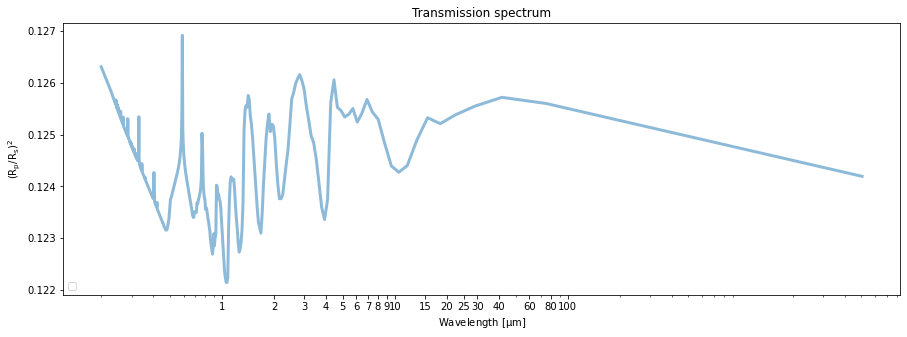

In [37]:
fig, ax = plt.subplots(figsize=(15, 5))


ax.plot(
        rp_eff_over_rs.coord("spectral_band_centres").points * 1e6,
        rp_eff_over_rs.data,
        #label="Dayside",
        linewidth=3,
        alpha=0.5,
    )
   
ax.set_title("Transmission spectrum")
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("($R_p/R_s)^2$")
ax.set_xscale("log")
#plt.xlim([0,1])

xticks = np.concatenate(
    [
        np.arange(1, 11, 1),
        np.arange(15, 35, 5),
        np.arange(40, 120, 20),
        
       
    ]
)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
#ax.indicate_inset_zoom(axins, edgecolor="black")
ax.legend(loc="lower left");
